In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
%matplotlib inline
from keras.models import model_from_json
os.environ["CUDA_VISIBLE_DEVICES"] = ""
import tensorflow as tf

## Load Dataset

In [2]:
TRAIN_DIR = 'dataset/train'
TEST_DIR = 'dataset/test'

## Create dataframe from dataset folder of images

In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

## Dataframe of train and test model

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


## Feature Extration

In [6]:
def extract_features(images):
    features = []
    for image in images:
        img = load_img(image, color_mode='grayscale')
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features), 48, 48, 1)
    return features


In [7]:
train_features = extract_features(train['image'])

In [8]:
test_features = extract_features(test['image'])

### Devide train and test feature with highest value of pixals

In [9]:
x_train = train_features/255.0
x_test = test_features/255.0

### Encoding Label to numerical formet

In [10]:
le = LabelEncoder()
le.fit(train['label'])
le.fit(test['label'])

LabelEncoder()

In [11]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

# **VGG-16 Model**

In [12]:
def create_vgg_model(input_shape, num_classes, dropout_rate=0.5):
    model = Sequential()

    # Define input layer
    model.add(Input(shape=input_shape))

    # Block 1
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))

    # Flatten the CNN output so that we can connect it with fully connected layers
    model.add(Flatten())

    # Fully connected layers
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(dropout_rate))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Example usage:
input_shape = (48, 48, 1)  # Input shape for grayscale images of size 48x48
num_classes = 7  # Number of emotions (anger, disgust, fear, happiness, sadness, surprise, neutral)
vgg_model = create_vgg_model(input_shape, num_classes)
vgg_model.summary()

# Compile the model
vgg_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 24, 24, 64)       256       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       7

## Train the model and eveluate with Test dataset

Epoch 1/200
721/721 [==============================] - 97s 88ms/step - loss: 1.7687 - accuracy: 0.2765 - val_loss: 5.7327 - val_accuracy: 0.0000e+00
Epoch 2/200
721/721 [==============================] - 61s 85ms/step - loss: 1.6399 - accuracy: 0.3014 - val_loss: 7.1877 - val_accuracy: 0.0000e+00
Epoch 3/200
721/721 [==============================] - 61s 84ms/step - loss: 1.6312 - accuracy: 0.3071 - val_loss: 9.6908 - val_accuracy: 0.0000e+00
Epoch 4/200
721/721 [==============================] - 61s 84ms/step - loss: 1.6266 - accuracy: 0.3071 - val_loss: 7.8903 - val_accuracy: 0.0000e+00
Epoch 5/200
721/721 [==============================] - 61s 85ms/step - loss: 1.6245 - accuracy: 0.3080 - val_loss: 8.2691 - val_accuracy: 0.0000e+00
Epoch 6/200
721/721 [==============================] - 61s 84ms/step - loss: 1.6211 - accuracy: 0.3109 - val_loss: 9.4076 - val_accuracy: 0.0000e+00
Epoch 7/200
721/721 [==============================] - 61s 84ms/step - loss: 1.6184 - accuracy: 0.3087 - v

Epoch 56/200
721/721 [==============================] - 61s 84ms/step - loss: 0.5839 - accuracy: 0.7907 - val_loss: 23.8542 - val_accuracy: 0.1036
Epoch 57/200
721/721 [==============================] - 61s 84ms/step - loss: 0.5687 - accuracy: 0.7945 - val_loss: 24.2257 - val_accuracy: 0.1018
Epoch 58/200
721/721 [==============================] - 61s 84ms/step - loss: 0.5572 - accuracy: 0.7992 - val_loss: 21.5810 - val_accuracy: 0.1183
Epoch 59/200
721/721 [==============================] - 61s 84ms/step - loss: 0.6441 - accuracy: 0.7668 - val_loss: 19.6282 - val_accuracy: 0.0203
Epoch 60/200
721/721 [==============================] - 61s 84ms/step - loss: 0.6708 - accuracy: 0.7545 - val_loss: 122.2010 - val_accuracy: 0.1662
Epoch 61/200
721/721 [==============================] - 61s 84ms/step - loss: 0.5502 - accuracy: 0.8024 - val_loss: 25.9397 - val_accuracy: 0.1219
Epoch 62/200
721/721 [==============================] - 61s 84ms/step - loss: 0.5146 - accuracy: 0.8160 - val_loss: 2

721/721 [==============================] - 61s 85ms/step - loss: 0.1156 - accuracy: 0.9652 - val_loss: 46.6369 - val_accuracy: 0.1157
Epoch 167/200
721/721 [==============================] - 61s 84ms/step - loss: 0.1261 - accuracy: 0.9619 - val_loss: 52.8610 - val_accuracy: 0.1603
Epoch 168/200
721/721 [==============================] - 61s 84ms/step - loss: 0.1233 - accuracy: 0.9641 - val_loss: 64.7922 - val_accuracy: 0.1178
Epoch 169/200
721/721 [==============================] - 61s 84ms/step - loss: 0.1138 - accuracy: 0.9662 - val_loss: 60.0046 - val_accuracy: 0.1467
Epoch 170/200
721/721 [==============================] - 61s 84ms/step - loss: 0.1270 - accuracy: 0.9624 - val_loss: 68.9998 - val_accuracy: 0.1294
Epoch 171/200
721/721 [==============================] - 61s 85ms/step - loss: 0.1185 - accuracy: 0.9659 - val_loss: 80.2722 - val_accuracy: 0.0933
Epoch 172/200
721/721 [==============================] - 61s 84ms/step - loss: 0.1180 - accuracy: 0.9646 - val_loss: 54.5854 -

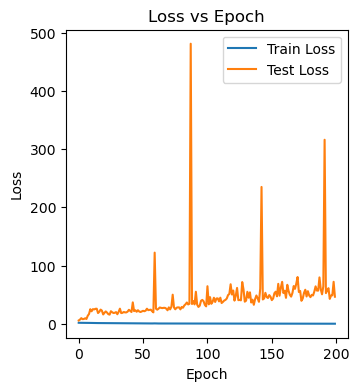

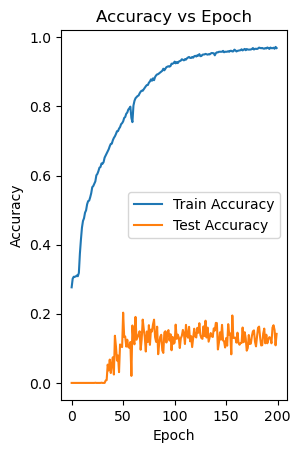

In [13]:
# Train the model
history = vgg_model.fit(x_train, y_train, batch_size=32, epochs=200, validation_split=0.2)

# Evaluate the model on the test dataset
loss, accuracy = vgg_model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

plt.figure(figsize=(8, 4))

# Plot loss vs epoch for both train and test
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Loss vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy vs epoch for both train and test
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Accuracy vs Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Save the model

In [14]:
model_json = vgg_model.to_json()
with open("VGG_Kaggle.json",'w') as json_file:
    json_file.write(model_json)
vgg_model.save("VGG_Kaggle.h5")